In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit as tscv, train_test_split
from sklearn.metrics import accuracy_score as acc, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
def result_to_numeric(x):
    if x=='W' or x=='w':
        return 1
    elif x=='L' or x=='l':
        return 0

In [4]:
# Read data
df = pd.read_csv('completeFinalDatasetFrom79_Pruned.csv', sep=',')
df = df.drop(['Year','TeamA','TeamB'],axis=1)
df['WL'] = df['WL'].apply(result_to_numeric)

In [5]:
df.head()

,O_ORebDiff,O_DRebDiff,O_AsstDiff,O_PFDiff,O_STLDiff,O_TODiff,O_BlkDiff,O_x3PMDiff,O_FGPDiff,O_FTPDiff,D_ORebDiff,D_DRebDiff,D_AsstDiff,D_PFDiff,D_BlkDiff,D_x3PMDiff,D_FTPDiff,WL
0,-0.852744,0.220118,0.725228,-1.624636,0.502332,1.219331,-0.141657,0.239121,0.635920,1.072682,0.663973,-1.368963,1.177983,-0.134638,-0.576137,0.362318,-0.717179,1
1,0.624856,1.077818,0.657237,-0.524262,0.468844,-0.359382,-0.519410,0.183512,-0.240265,0.886943,0.567872,0.354402,0.037999,0.750125,-0.032008,0.024564,0.717716,1
2,1.771649,-2.261899,-0.802283,-1.013957,0.122792,-0.154021,0.472191,0.289170,-0.764677,-1.223977,0.366933,-1.077103,-1.491478,-0.916819,-0.464111,-0.184229,1.833909,1
3,-1.080633,-0.667943,0.113317,-0.190117,2.924691,2.104951,2.467195,-0.255804,1.423435,0.492501,1.057116,-2.223696,-0.147248,1.275853,-2.096500,0.116679,-0.744617,1
4,0.102917,1.480102,0.589247,-0.397517,-1.495834,0.064175,2.384562,-0.266926,1.496380,0.085936,0.838703,-1.424555,1.415479,-1.224563,-0.112027,-0.135102,0.450549,1


In [6]:
final_df = pd.DataFrame(df.loc[:,['O_DRebDiff', 'O_STLDiff', 'O_x3PMDiff', 'O_FTPDiff', 'D_DRebDiff', 'D_AsstDiff', 'D_PFDiff', 'D_BlkDiff','WL']])

In [7]:
final_df.head()

,O_DRebDiff,O_STLDiff,O_x3PMDiff,O_FTPDiff,D_DRebDiff,D_AsstDiff,D_PFDiff,D_BlkDiff,WL
0,0.220118,0.502332,0.239121,1.072682,-1.368963,1.177983,-0.134638,-0.576137,1
1,1.077818,0.468844,0.183512,0.886943,0.354402,0.037999,0.750125,-0.032008,1
2,-2.261899,0.122792,0.289170,-1.223977,-1.077103,-1.491478,-0.916819,-0.464111,1
3,-0.667943,2.924691,-0.255804,0.492501,-2.223696,-0.147248,1.275853,-2.096500,1
4,1.480102,-1.495834,-0.266926,0.085936,-1.424555,1.415479,-1.224563,-0.112027,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df.values[:,:-1],
    final_df.values[:,-1],
    test_size=0.30,
    random_state=42,
    shuffle=False)

y_train = y_train.astype('int')
y_test = y_test.astype('int')
print("0",len(y_train) - np.count_nonzero(y_train))
print("1",np.count_nonzero(y_train))

0 75
1 186


In [13]:
#linear SVM
parameters = {'C':[3.05e-05,6.10e-05,0.0001220703125,0.000244140625,0.00048828125,0.0009765625,0.001953125,
                0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]}
svc = SVC(kernel='linear',class_weight='balanced')
clf = GridSearchCV(svc, param_grid=parameters,cv=tscv(n_splits=5))
clf.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3.05e-05, 6.1e-05, 0.0001220703125,
                               0.000244140625, 0.00048828125, 0.0009765625,
                               0.001953125, 0.00390625, 0.0078125, 0.015625,
                               0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128, 256, 512, 1024]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
clf.best_params_

{'C': 0.00390625}

In [15]:
final_linear_svc = SVC(C=0.00390625,kernel='linear',class_weight='balanced')
final_linear_svc.fit(X_train,y_train)
y_preds = final_linear_svc.predict(X_test)
print("Result for Linear Kernel with best params:")
print(classification_report(y_test,y_preds))

Result for Linear Kernel with best params:
              precision    recall  f1-score   support

           0       0.33      0.59      0.42        32
           1       0.76      0.52      0.62        81

    accuracy                           0.54       113
   macro avg       0.55      0.56      0.52       113
weighted avg       0.64      0.54      0.56       113



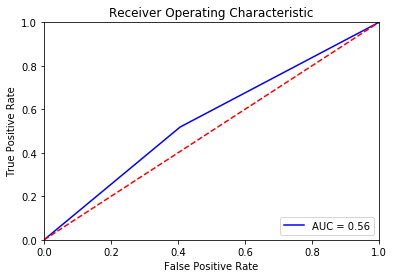

In [16]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#sigmoid SVM
parameters = {'C':[3.05e-05,6.10e-05,0.0001220703125,0.000244140625,0.00048828125,0.0009765625,0.001953125,
                0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024],'gamma':[3.05e-05,6.10e-05,0.0001220703125,0.000244140625,0.00048828125,0.0009765625,0.001953125,
                0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024],'coef0' : [0.0001, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 0.3, 1, 2, 5, 10]}
svc = SVC(kernel='sigmoid',class_weight='balanced')
clf = GridSearchCV(svc, param_grid=parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='sigmoid',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3.05e-05, 6.1e-05, 0...
                               16, 32, 64, 128, 256, 512, 1024],
                         'coef0': [0.0001, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2,
                                   0.3, 1, 2, 5, 10],
                         'gamma': [3.05e-05, 6.1e-05, 0.0001220703125,
                                   0.000244140625, 0.00048828125, 0.0009765625,
                                   0.001953125, 0.00390625, 0.0078125, 0.015625,
                                   0.03125, 0.06

In [18]:
clf.best_params_

{'C': 0.03125, 'coef0': 1, 'gamma': 0.25}

In [19]:
final_sigmoid_svc = SVC(C=0.03125,kernel='sigmoid',gamma=0.25,coef0=1,class_weight='balanced')
final_sigmoid_svc.fit(X_train,y_train)
y_preds = final_sigmoid_svc.predict(X_test)
print("Result for Sigmoid Kernel with best params:")
print(classification_report(y_test,y_preds))

Result for Sigmoid Kernel with best params:
              precision    recall  f1-score   support

           0       0.33      0.47      0.39        32
           1       0.75      0.63      0.68        81

    accuracy                           0.58       113
   macro avg       0.54      0.55      0.54       113
weighted avg       0.63      0.58      0.60       113



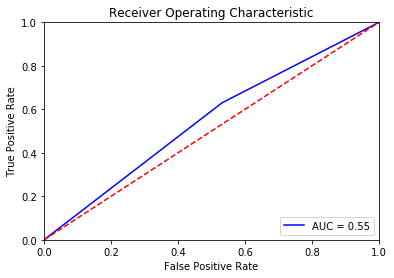

In [20]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#rbf SVM
parameters = {'C':[3.05e-05,6.10e-05,0.0001220703125,0.000244140625,0.00048828125,0.0009765625,0.001953125,
                0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024],'gamma':[3.05e-05,6.10e-05,0.0001220703125,0.000244140625,0.00048828125,0.0009765625,0.001953125,
                0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]}
svc = SVC(kernel='rbf',class_weight='balanced')
clf = GridSearchCV(svc, param_grid=parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3.05e-05, 6.1e-05, 0.000...
                               0.001953125, 0.00390625, 0.0078125, 0.015625,
                               0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128, 256, 512, 1024],
                         'gamma': [3.05e-05, 6.1e-05, 0.0001220703125,
                                   0.000244140625, 0.00048828125, 0.0009765625,
                                   0.001953125, 0.00390625, 0.0078125, 0.015625,
                          

In [22]:
clf.best_params_

{'C': 0.25, 'gamma': 0.00390625}

In [23]:
final_rbf_svc = SVC(C=0.25,kernel='rbf',gamma=0.0390625,class_weight='balanced')
final_rbf_svc.fit(X_train,y_train)
y_preds = final_rbf_svc.predict(X_test)
print("Result for RBF Kernel with best params:")
print(classification_report(y_test,y_preds))

Result for RBF Kernel with best params:
              precision    recall  f1-score   support

           0       0.31      0.62      0.41        32
           1       0.75      0.44      0.56        81

    accuracy                           0.50       113
   macro avg       0.53      0.53      0.49       113
weighted avg       0.62      0.50      0.52       113



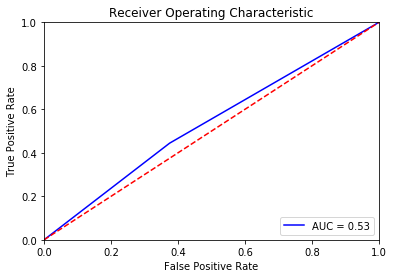

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()